# Stability Examples 
The following example hydrographs illustrate how the default stability analysis method (slope change aggregation) works. This method:
1. Normalizes the hydrograph to a 0-1 range
2. Computes differences between consecutive points (assumes constant timestep)
3. Detects sign changes in the differences (slope reversals)
4. Sums the magnitude of these sign changes
5. Normalizes by the length of the hydrograph

This produces a score between 0 and 1, where:
- 0.0 indicates perfect stability (no oscillations)
- Higher values indicate more instability
- Default threshold of 0.002 classifies hydrographs as stable/unstable

In [2]:
import hydrostab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path


def analyze_and_plot(csv: Path):
    """Analyze hydrograph stability and plot with sign changes highlighted."""
    df = pd.read_csv(csv)
    h_values = df.get("flow", df.get("wselev"))
    df["time"] = pd.to_datetime(df["time"])
    timestep = df["time"].diff().mean()
    is_stable, score = hydrostab.stability(h_values)

    # Normalize to range of 0.0 to 1.0
    h_range = np.ptp(h_values)
    h_norm = (h_values - np.min(h_values)) / h_range

    # Compute first differences
    diff = np.diff(h_norm)

    # Detect sign changes (positive to negative or vice versa)
    sign_changes = np.sign(diff[1:]) != np.sign(diff[:-1])

    # Compute magnitude of sign changes
    sign_changes_magnitude = np.abs(np.diff(diff)) / len(h_values)

    ax = df.plot(x="time", y="flow", figsize=(10, 5))
    text_x = (df["time"].max() - df["time"].min()) * 0.4 + df["time"].min()
    text_y = (h_values.max() - h_values.min()) * 0.8 + h_values.min()
    color = "green" if is_stable else "red"
    text = f"Stability score: {score:.5f}\nStable: {is_stable}\nTimestep: {timestep}"

    # plot sign changes as dots on the hydrograph
    sc = ax.scatter(
        df["time"].iloc[1:-1][sign_changes].values,
        df["flow"].iloc[1:-1][sign_changes].values,
        c=sign_changes_magnitude[(sign_changes)],
        cmap="YlOrRd",
        vmin=0,
        vmax=0.002 * 0.1,
    )
    fig = ax.get_figure()
    cbar = fig.colorbar(sc, ax=ax)
    cbar.set_label("Relative sign change magnitude")

    ax.text(text_x, text_y, text, color=color)
    ax.set_title(csv.name)

    plt.show()

## Stable Hydrograph Examples

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


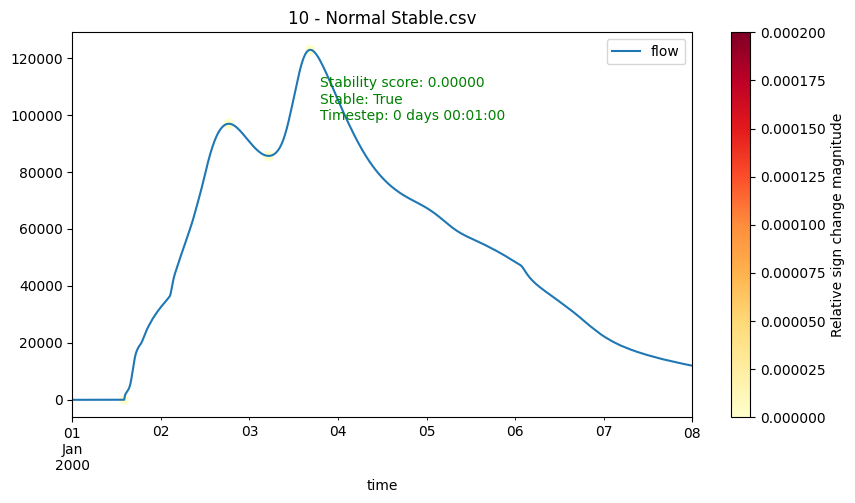

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


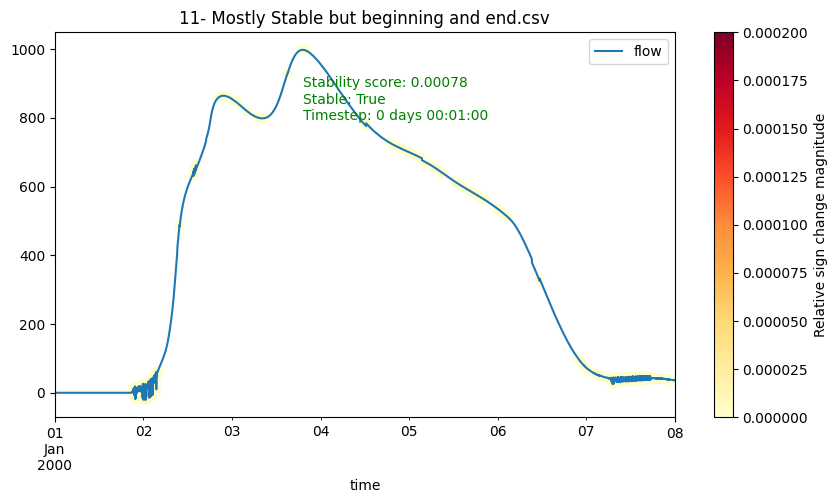

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


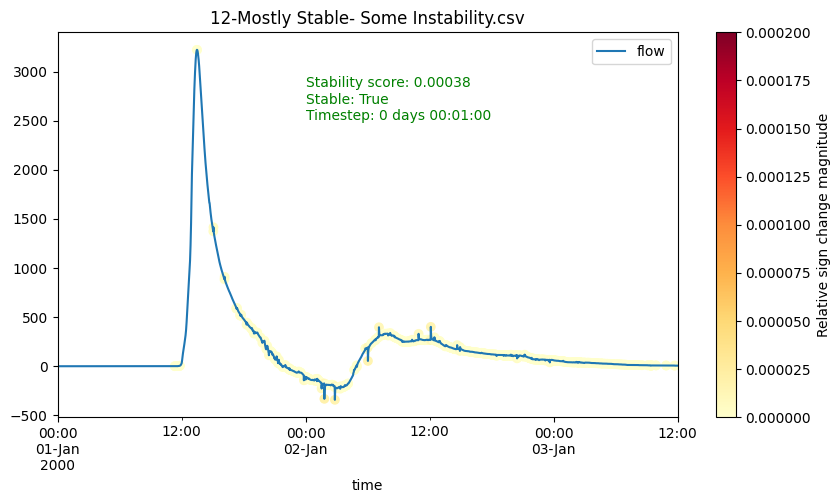

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


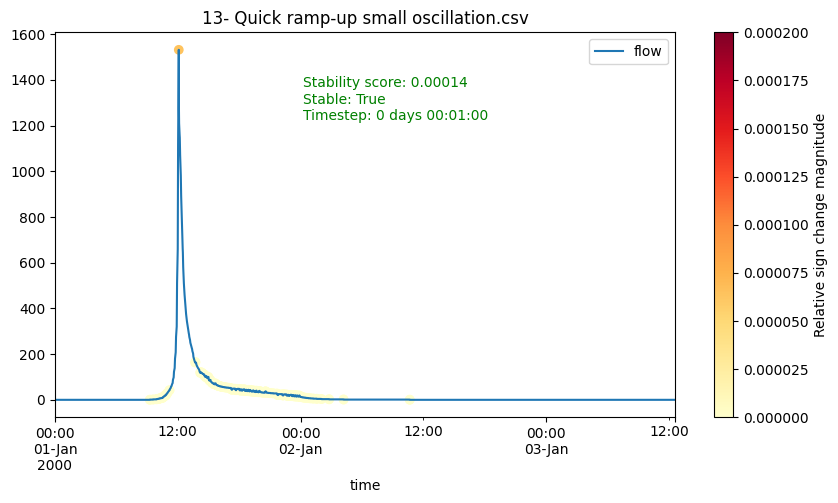

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


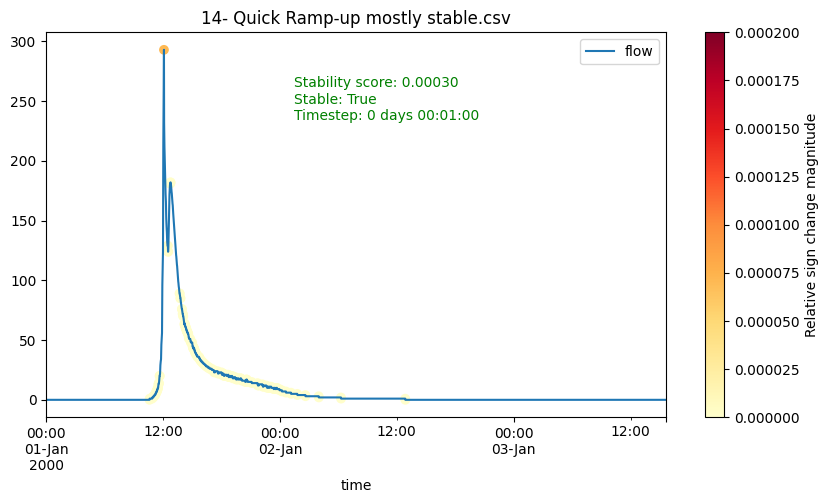

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


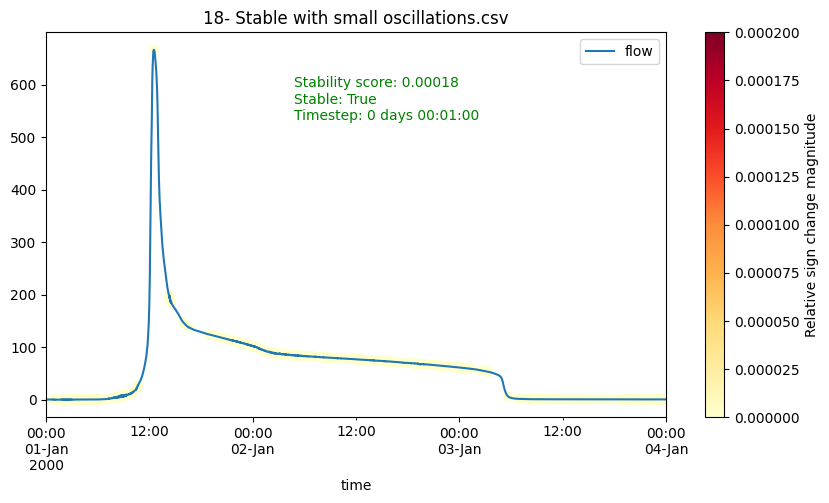

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


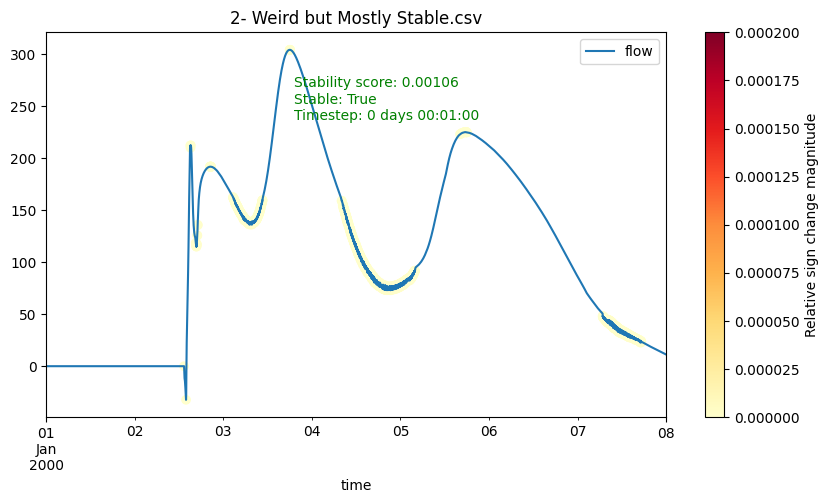

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


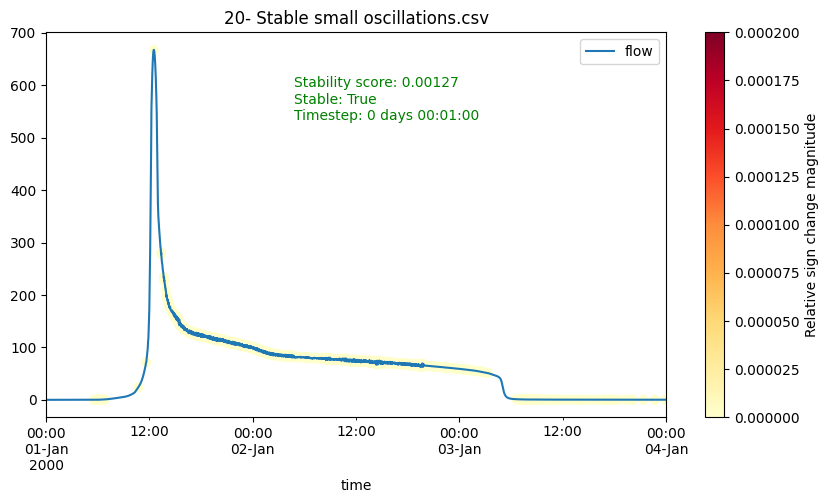

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


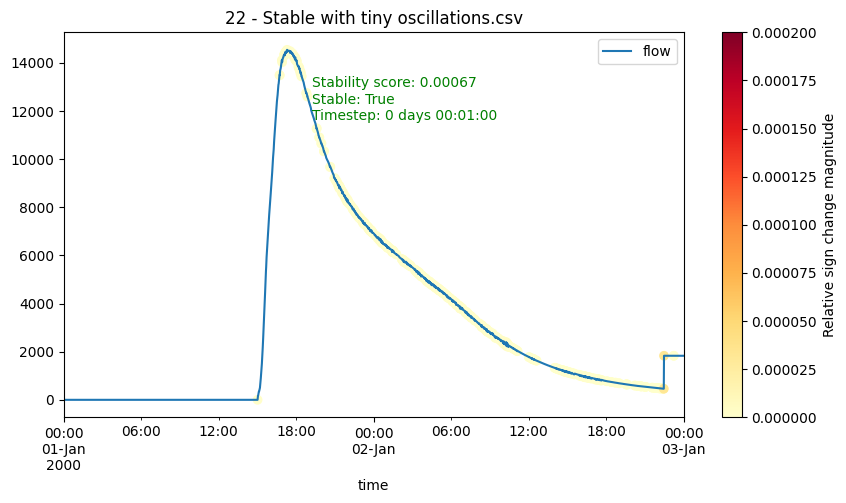

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


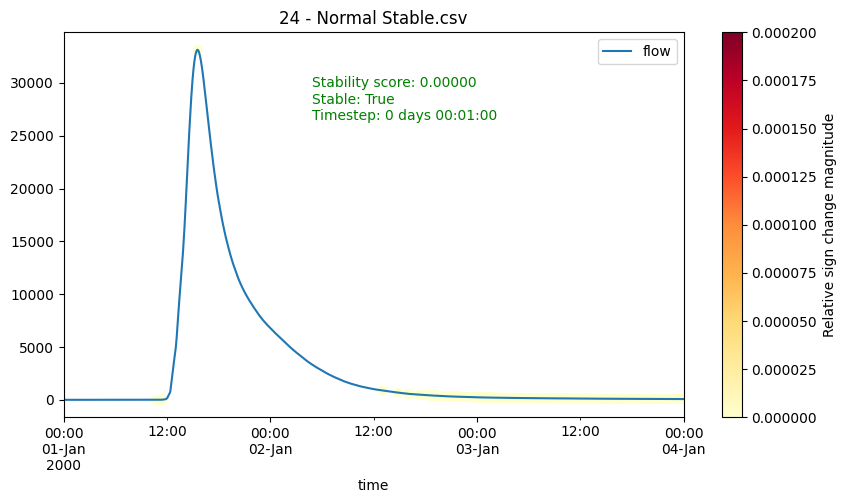

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


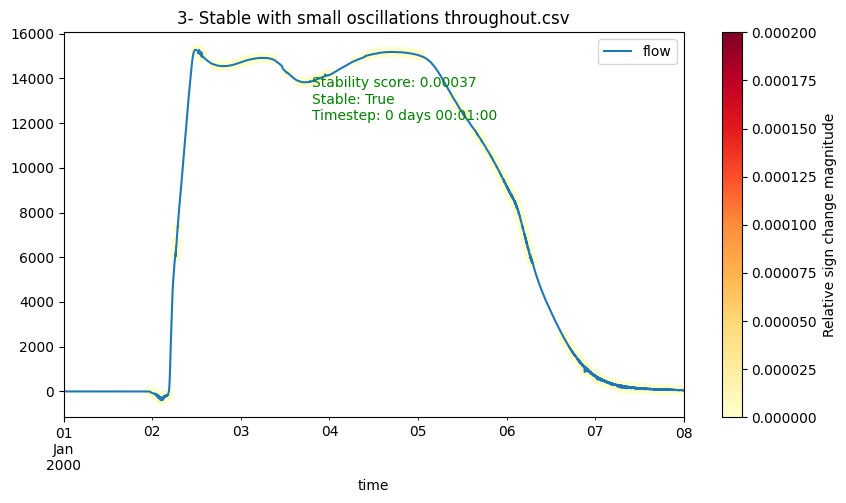

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


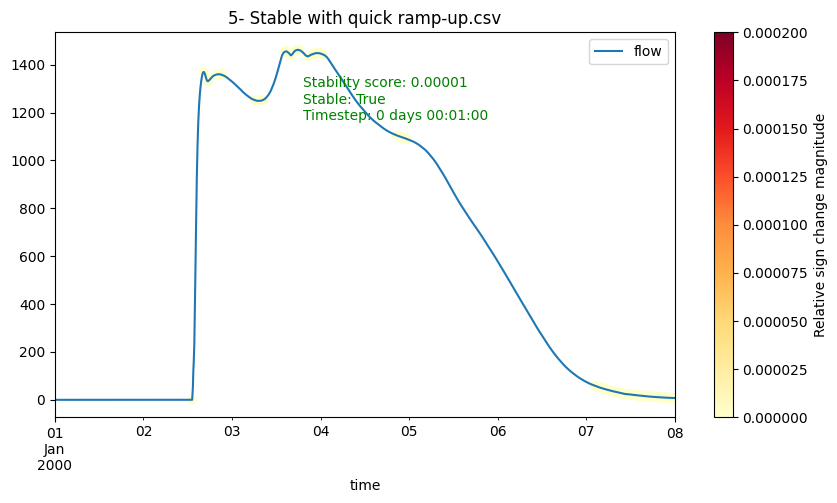

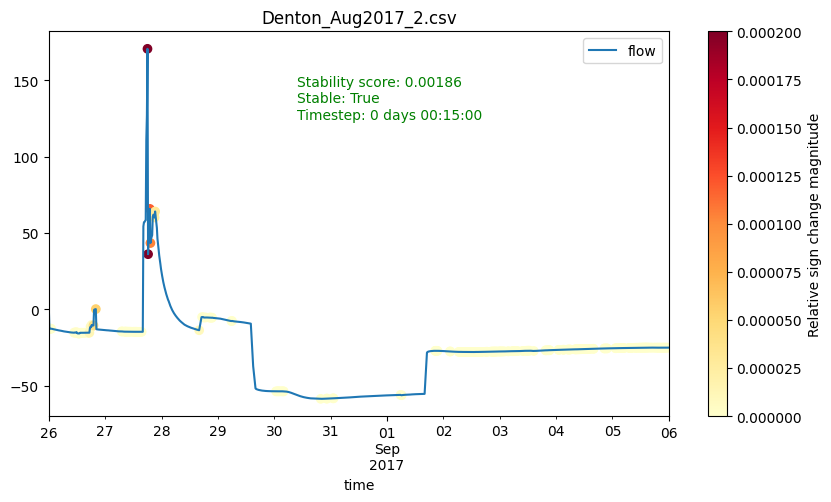

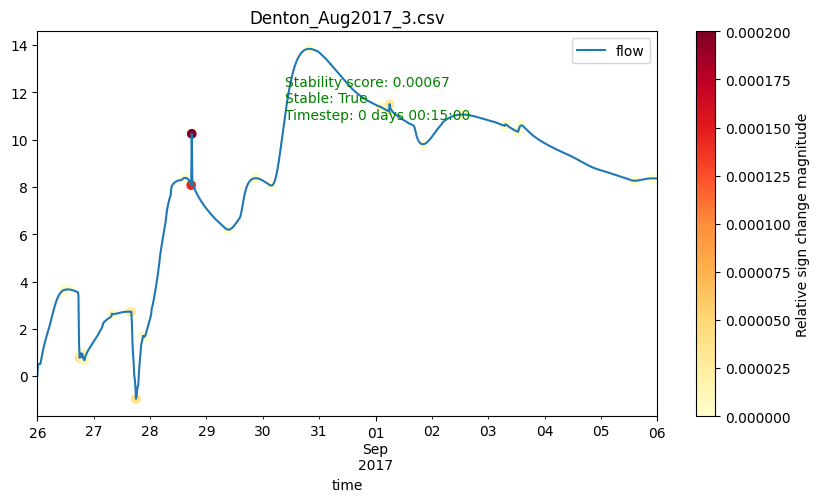

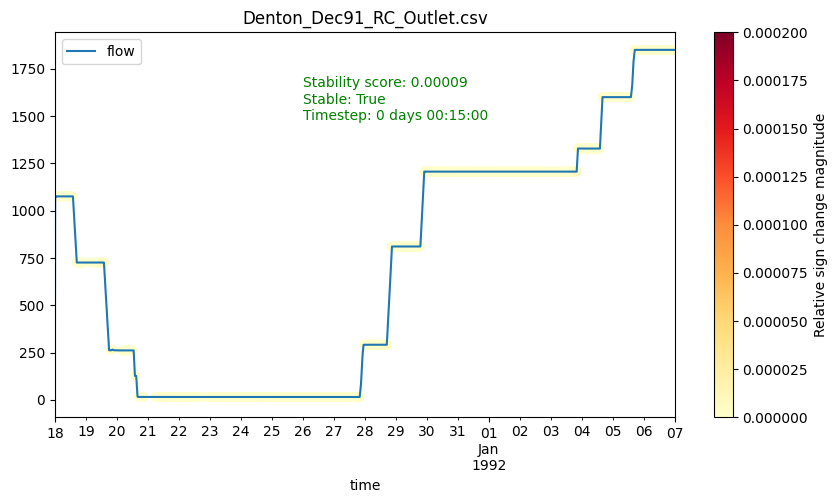

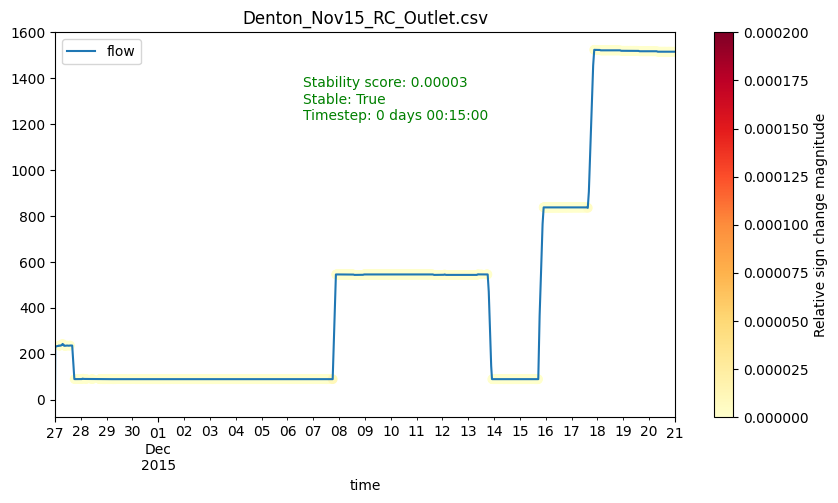

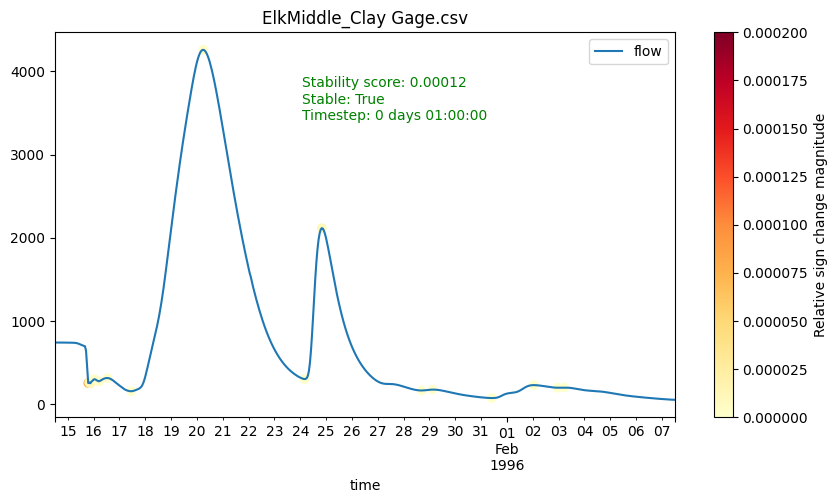

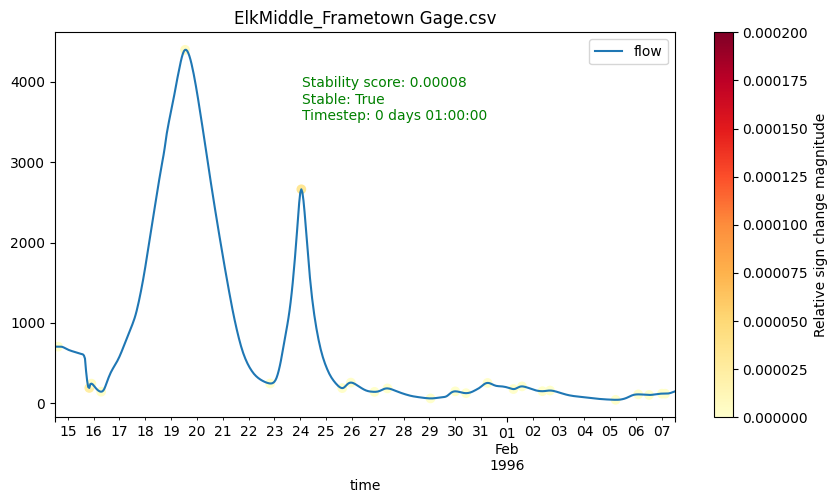

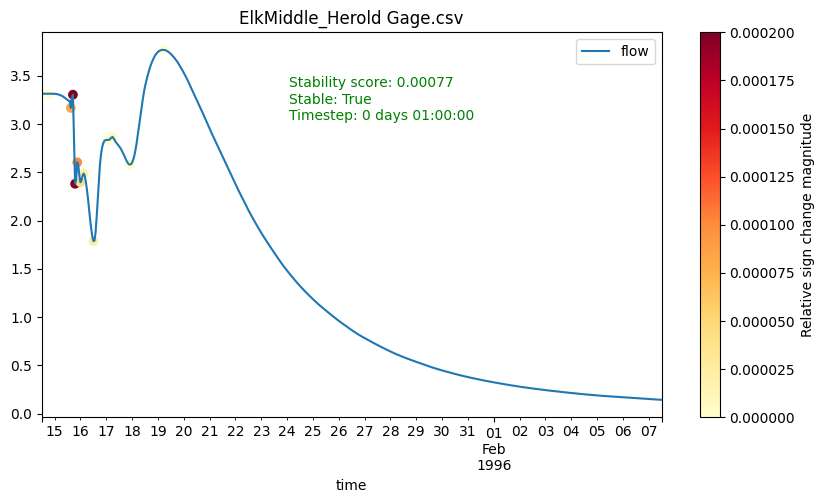

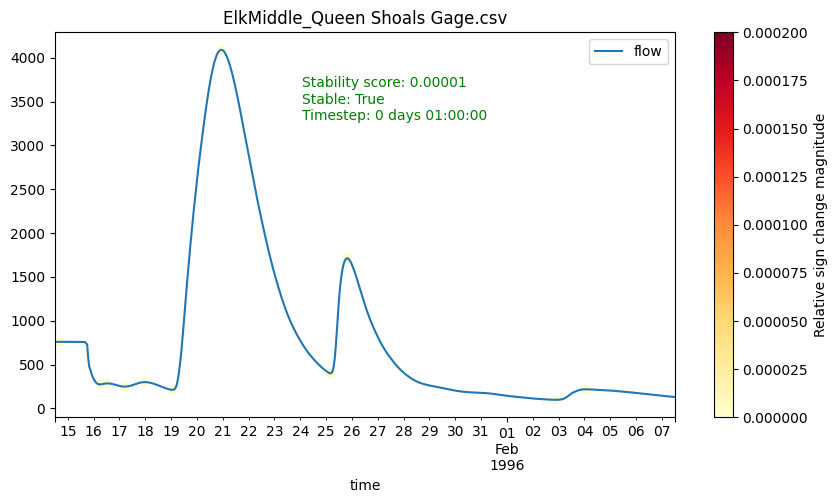

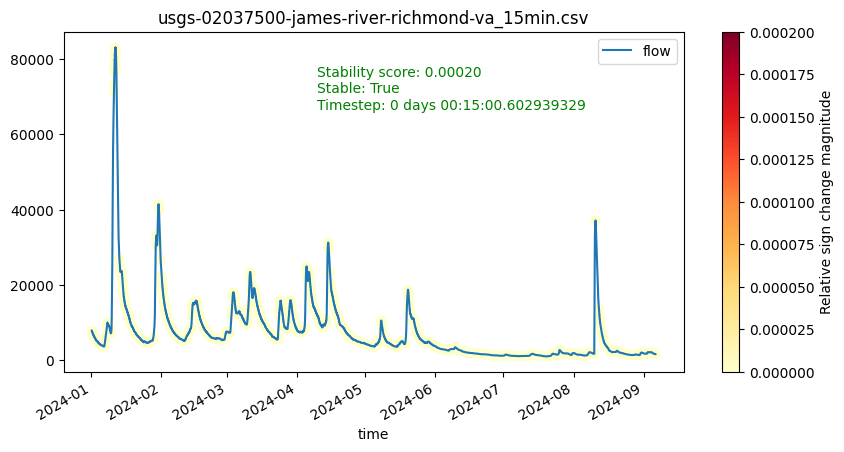

In [3]:
for csv in sorted(Path("../tests/data/hydrographs/stable").glob("*.csv")):
    analyze_and_plot(csv)

## Unstable Hydrograph Examples

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


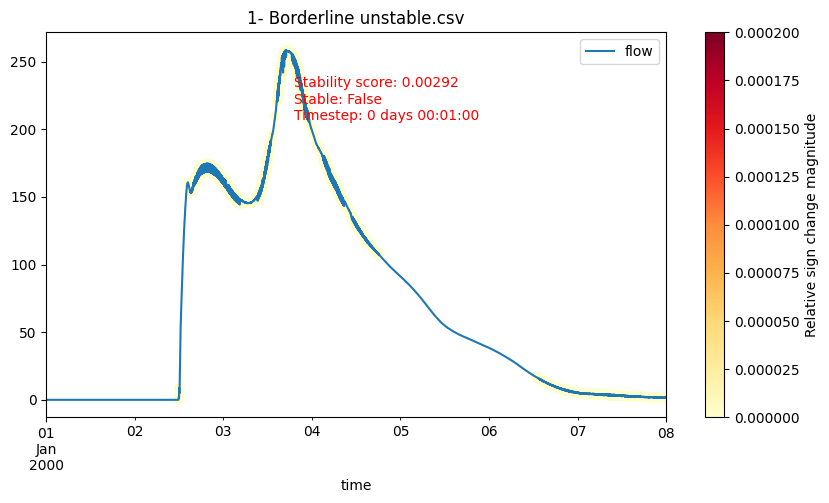

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


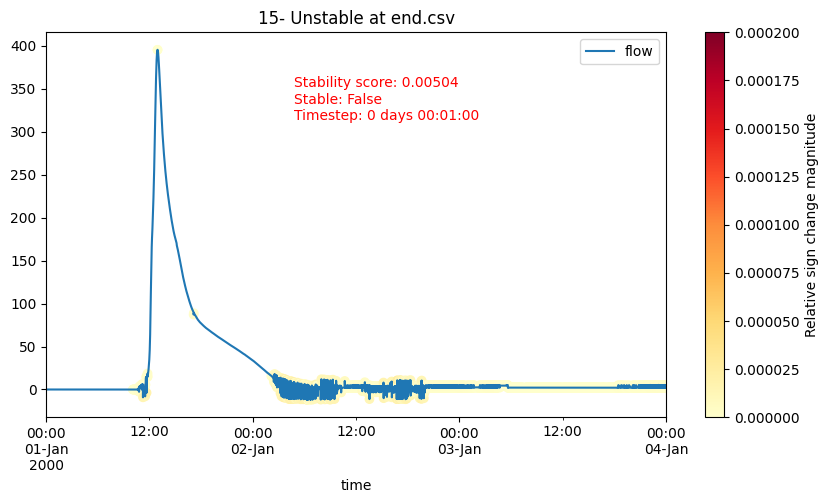

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


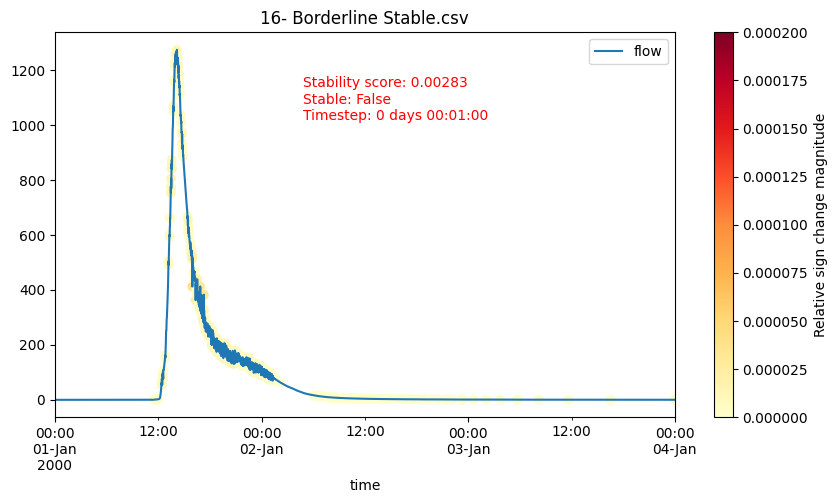

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


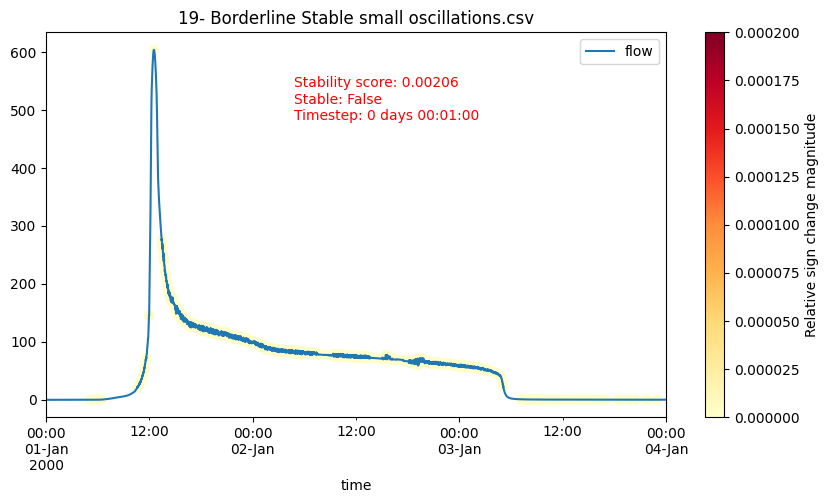

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


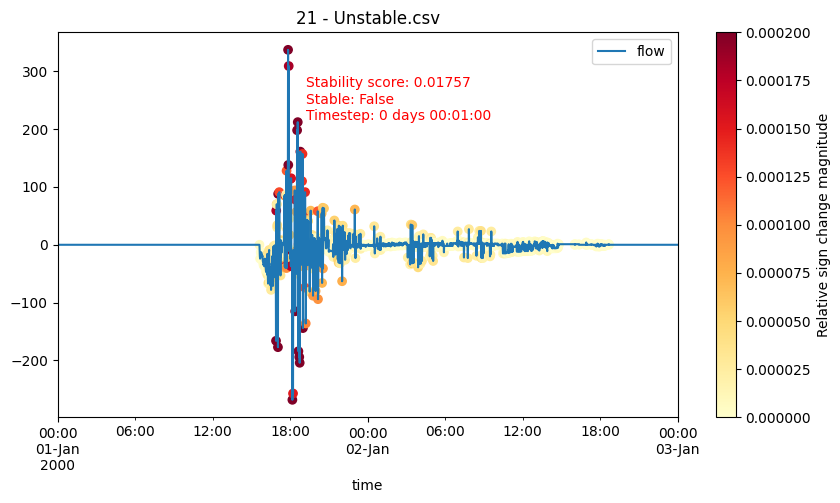

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


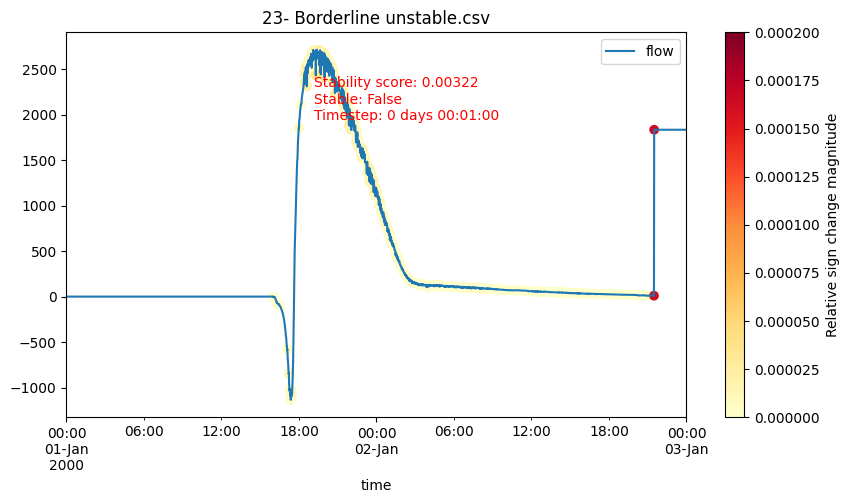

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


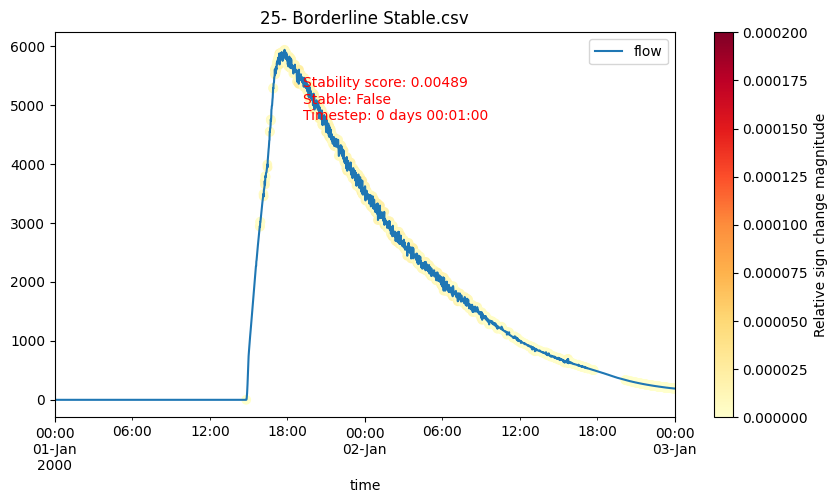

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


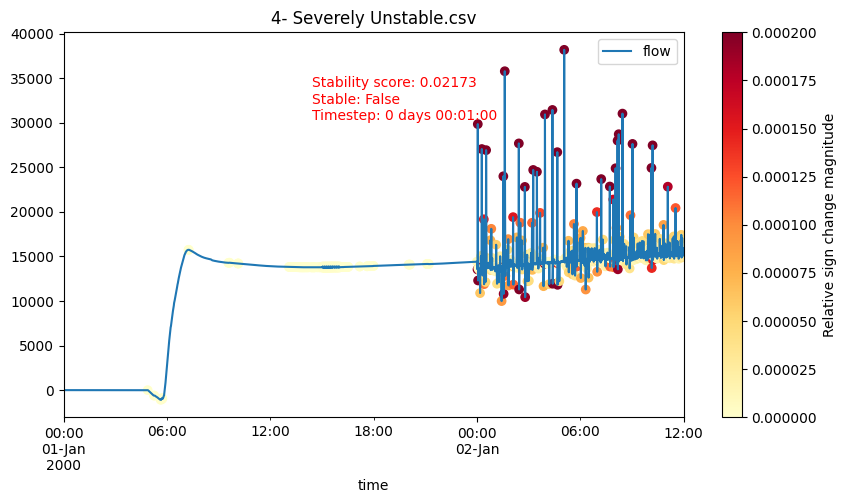

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


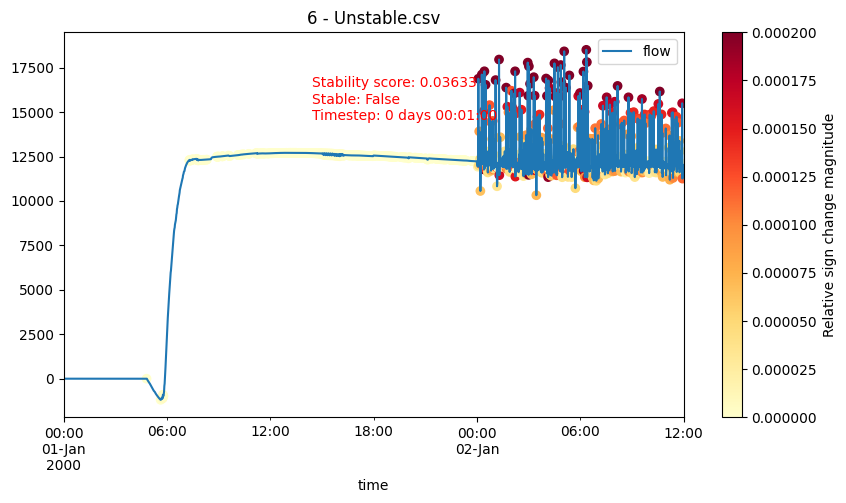

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


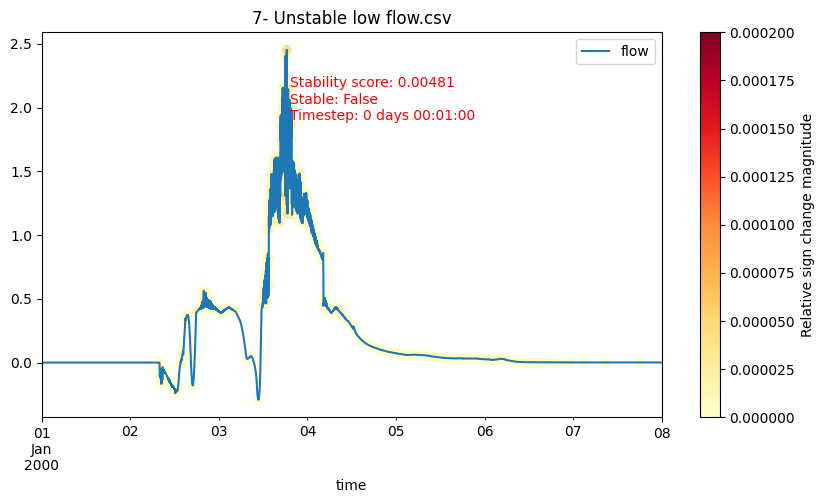

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


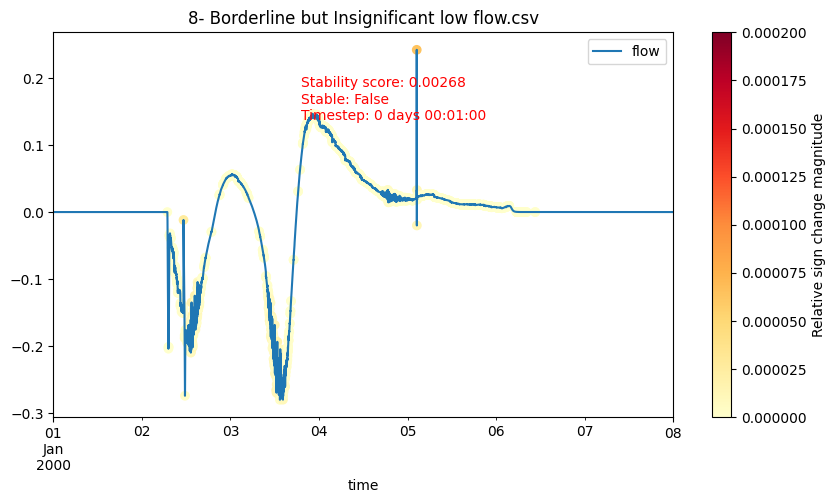

/tmp/ipykernel_455574/1946821833.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["time"] = pd.to_datetime(df["time"])


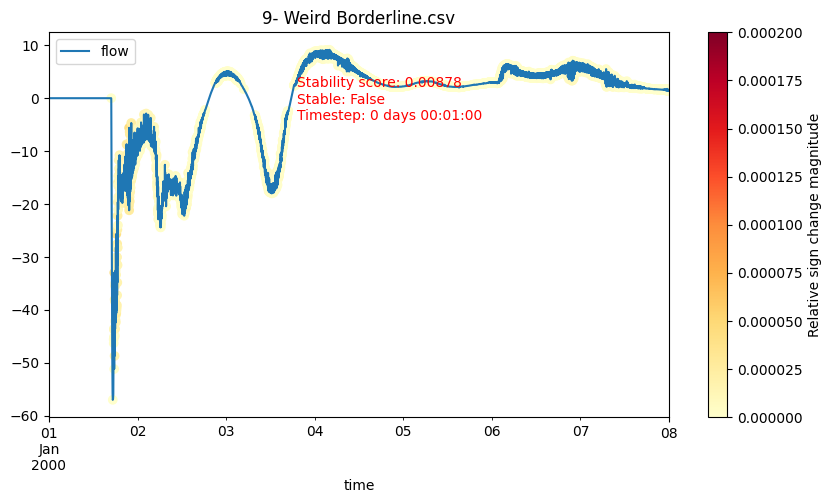

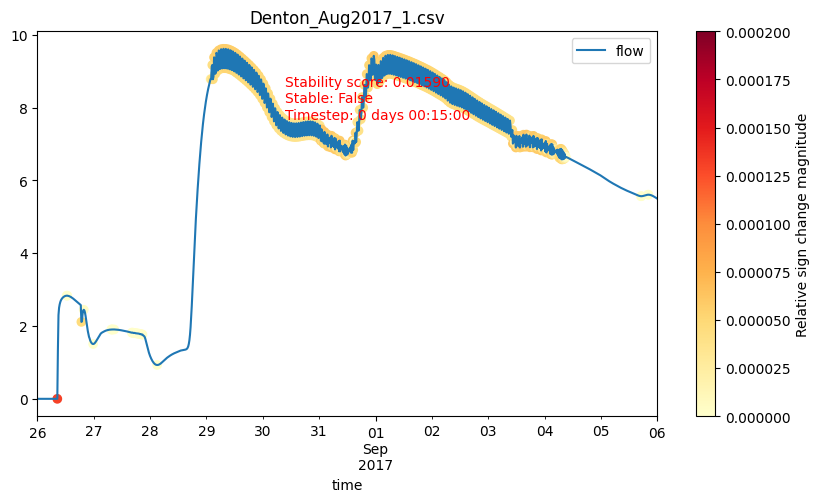

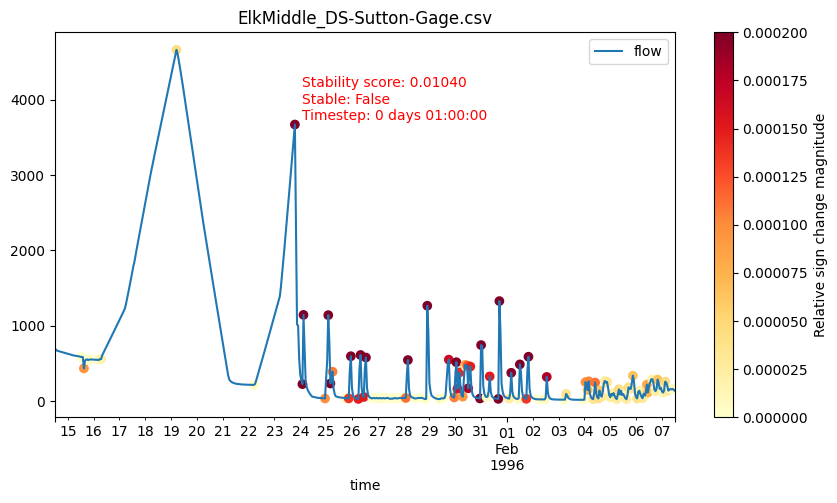

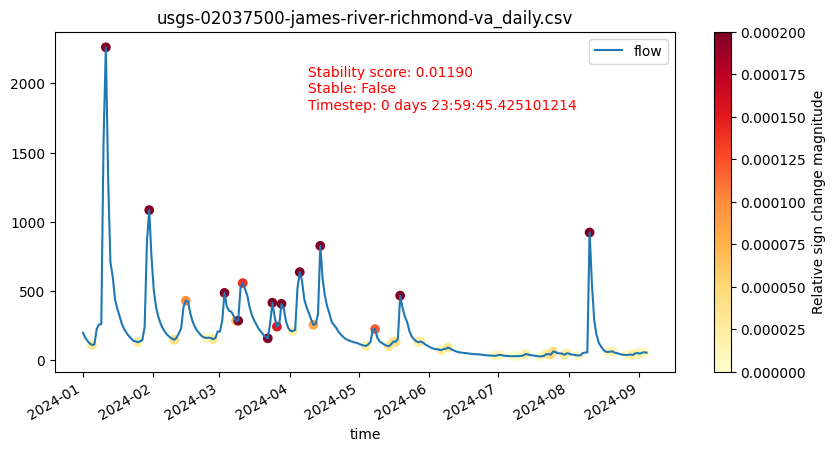

In [4]:
for csv in sorted(Path("../tests/data/hydrographs/unstable").glob("*.csv")):
    analyze_and_plot(csv)